In [10]:
import numpy as np
import os, sys
import time

In [4]:
#CAFFE = '/cvgl/software/opt/caffe/'
CAFFE = '/opt/caffe-master/'
caffe_python_path = os.path.join(CAFFE, 'python')
sys.path.insert(0, caffe_python_path)

In [5]:
import caffe

In [6]:
caffe.set_device(0)

In [133]:
model_file = '/cvgl/u/rsluo/vgg_cnn_f/architectures/VGG_F_trial1_test.prototxt'
weights_file = '/cvgl/u/rsluo/vgg_cnn_f/snapshots/VGG_F_trial1__iter_280000.caffemodel'
num_examples = 3000
batch_size = 32
data_layer_name = 'data'
end_layer_name = 'pool6'

In [134]:
net = caffe.Net(model_file, weights_file, caffe.TEST)

In [135]:
labels = []
preds = []

In [136]:
iterations = 0
t0 = time.time()
while len(preds) < num_examples:
    iterations += 1
    t1 = time.time()
    print 'Iteration {}: {} examples, {} seconds'.format(iterations, iterations * batch_size, t1-t0)
    # Get prediction for test example
    net.forward(end=end_layer_name)
    preds += list(net.blobs[end_layer_name].data.squeeze().argmax(axis=1))
    # Get label for test example
    labels += list(caffe.io.blobproto_to_array(net.blobs['label']).squeeze())

Iteration 1: 32 examples, 0.000241994857788 seconds
Iteration 2: 64 examples, 21.0755531788 seconds
Iteration 3: 96 examples, 40.4971630573 seconds
Iteration 4: 128 examples, 59.9510710239 seconds
Iteration 5: 160 examples, 80.400635004 seconds
Iteration 6: 192 examples, 99.5510439873 seconds
Iteration 7: 224 examples, 118.482439041 seconds
Iteration 8: 256 examples, 137.497596025 seconds
Iteration 9: 288 examples, 156.532611132 seconds
Iteration 10: 320 examples, 175.536591053 seconds
Iteration 11: 352 examples, 195.285148144 seconds
Iteration 12: 384 examples, 214.414114952 seconds
Iteration 13: 416 examples, 233.358546019 seconds
Iteration 14: 448 examples, 252.538581133 seconds
Iteration 15: 480 examples, 271.923835993 seconds
Iteration 16: 512 examples, 291.425678015 seconds
Iteration 17: 544 examples, 310.492506027 seconds
Iteration 18: 576 examples, 329.737177134 seconds
Iteration 19: 608 examples, 348.756217957 seconds
Iteration 20: 640 examples, 367.896639109 seconds
Iteration

In [141]:
labels = labels[:3000]
preds = preds[:3000]

In [142]:
correct = 0
print 'Total predictions: {}'.format(len(preds))
for i in xrange(len(labels)):
    #print 'True: {}, Predicted: {}'.format(labels[i], preds[i])
    if int(labels[i]) == int(preds[i]):
        correct += 1
print 'Number correct: {}'.format(correct)

Total predictions: 3000
Number correct: 2055


#### Plot confusion matrix

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix

In [157]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [0, 1, 2]
    plt.xticks(tick_marks, ['low', 'med', 'high'], rotation=45)
    plt.yticks(tick_marks, ['low', 'medium', 'high'])
    plt.ylabel('True nightlight class')
    plt.xlabel('Predicted nightlight class')
    plt.tight_layout()
    plt.savefig('../plots/confusion_matrix.png', format='png')
    plt.show()

Confusion matrix, without normalization:
[[917  44   4]
 [278 531 230]
 [152 237 607]]


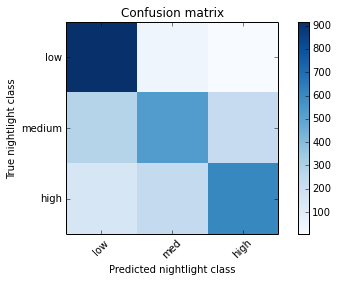

In [158]:
# Plot confusion matrix
cm = confusion_matrix(labels, preds)
np.set_printoptions(precision=2)
print 'Confusion matrix, without normalization:'
print cm
plot_confusion_matrix(cm)

Normalized confusion matrix
[[ 0.95  0.05  0.  ]
 [ 0.27  0.51  0.22]
 [ 0.15  0.24  0.61]]


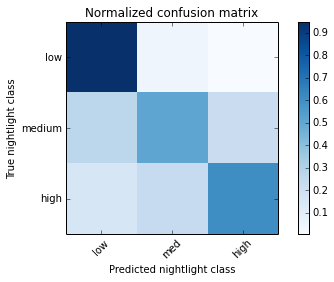

In [159]:
# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')